exp 6 To implement SMOTE techniques to generate synthetic data to solve the problem of class
imbalance

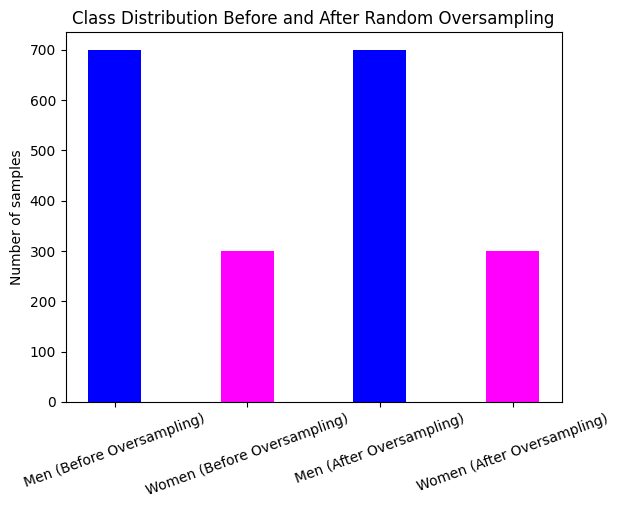

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_classification

# Step 1: Create an imbalanced dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.7, 0.3],
                            n_informative=3, n_redundant=1, flip_y=0,
                            n_features=5, n_clusters_per_class=1,
                            n_samples=1000, random_state=42)

# Step 2: Perform Random Oversampling
# Find the minority class size (target class with less samples)
minority_class = min(Counter(y).values())

# Separate the classes
X_minority = X[y == 1]
y_minority = y[y == 1]
X_majority = X[y == 0]
y_majority = y[y == 0]

# Oversample the minority class
X_minority_resampled = X_minority[np.random.choice(X_minority.shape[0], minority_class, replace=True)]
y_minority_resampled = y_minority[np.random.choice(y_minority.shape[0], minority_class, replace=True)]

# Combine back the resampled minority class with the majority class
X_resampled = np.vstack([X_majority, X_minority_resampled])
y_resampled = np.hstack([y_majority, y_minority_resampled])

# Class distributions before and after random oversampling
before_counts = Counter(y)
after_counts = Counter(y_resampled)

# Set positions for bars with "Men" and "Women"
x_labels = ["Men (Before Oversampling)", "Women (Before Oversampling)",
            "Men (After Oversampling)", "Women (After Oversampling)"]
x_positions = np.arange(len(x_labels))

# Plot the bars
plt.bar(x_positions[:2], before_counts.values(), color=['blue', 'fuchsia'], width=0.4)
plt.bar(x_positions[2:], after_counts.values(), color=['blue', 'fuchsia'], width=0.4)

# Adjust x-axis labels without index
plt.xticks(x_positions, x_labels, rotation=20)  # Rotate labels for better readability

# Add labels and title
plt.ylabel("Number of samples")
plt.title("Class Distribution Before and After Random Oversampling")

# Show the plot without the legend
plt.show()
